# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.195777e+01     1.508232e+01
 * time: 0.003184080123901367
     1     6.459560e+01     8.461053e+00
 * time: 0.009266138076782227
     2     5.803697e+01     9.752283e+00
 * time: 0.02246403694152832
     3     4.319319e+01     8.447501e+00
 * time: 0.0405120849609375
     4     3.358870e+01     7.880067e+00
 * time: 0.13343596458435059
     5     1.499746e+01     2.914728e+00
 * time: 0.15184307098388672
     6     1.065677e+01     3.487171e+00
 * time: 0.16520214080810547
     7     9.118628e+00     3.961964e+00
 * time: 0.18670201301574707
     8     8.188559e+00     4.309800e+00
 * time: 0.20174813270568848
     9     7.457620e+00     2.336687e+00
 * time: 0.21521806716918945
    10     6.751666e+00     1.501715e+00
 * time: 0.23074913024902344
    11     6.412215e+00     1.830737e+00
 * time: 0.24822211265563965
    12     6.140702e+00     1.146702e+00
 * time: 0.2590670585632324
    13     5.976041e+00     1.108646e+00
 * time:

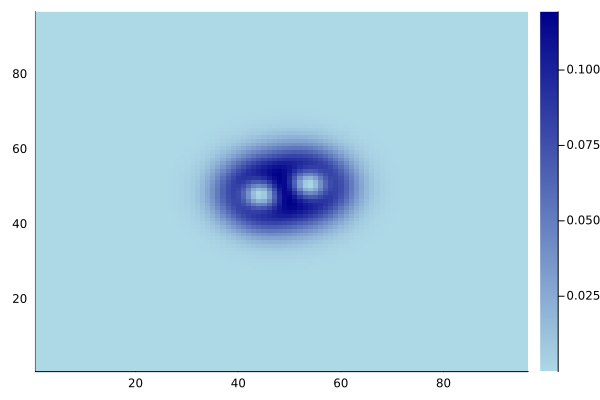

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)